In [10]:
import pandas as pd
import numpy as np

In [ ]:
"""Installations pour faire des cartes"""
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas
!pip install topojson

In [14]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [15]:
emplacement = "Données_clean/DVF_75_2023_clean.csv"
df_visu = pd.read_csv(emplacement)
df_visu = df_visu.head(2000)

In [6]:
"""manip du prof pour vérifier les chemins

import os

"""remarques sur github, commandes du terminal :
- ls : lister 
- cd : change directory 
"""

In [ ]:
"""vérifier le cwd
os.getcwd()
"""

In [19]:
"""On transforme le dataframe en geodataframe, les données sont au format WGS84 au départ"""
geo_df_visu = gpd.GeoDataFrame(
    df_visu, geometry=gpd.points_from_xy(df_visu.longitude, df_visu.latitude), crs="WGS84"
)

In [20]:
geo_df_visu.head(3)

,Unnamed: 0,id_mutation,date_mutation,prix,type_local,nb_dépendances,surface_reelle_bati,surface_carrez,nombre_pieces_principales,prix_au_m2_carrez,...,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,longitude,latitude,geometry
0,2,2023-543616,2023-01-04,140000.0,Appartement,0.0,18.0,18.75,1.0,7467.0,...,RUE DE COURCELLES,2387,75017.0,75117,Paris 17e Arrondissement,75,75117000BG0053,2.298612,48.884255,POINT (2.29861 48.88426)
1,3,2023-543617,2023-01-05,400000.0,Appartement,0.0,43.0,43.80,1.0,9132.0,...,RUE TURGOT,9508,75009.0,75109,Paris 9e Arrondissement,75,75109000BD0036,2.345859,48.880564,POINT (2.34586 48.88056)
2,5,2023-543619,2023-01-03,295000.0,Appartement,0.0,28.0,NaN,2.0,NaN,...,RUE EMILE LEVEL,3246,75017.0,75117,Paris 17e Arrondissement,75,75117000DG0040,2.318419,48.893075,POINT (2.31842 48.89308)
3,7,2023-543620,2023-01-03,300400.0,Appartement,1.0,36.0,36.11,2.0,8319.0,...,BD BARBES,0662,75018.0,75118,Paris 18e Arrondissement,75,75118000BV0098,2.349162,48.891187,POINT (2.34916 48.89119)
4,13,2023-543623,2023-01-04,213000.0,Appartement,1.0,27.0,NaN,1.0,NaN,...,RUE BOUCRY,1139,75018.0,75118,Paris 18e Arrondissement,75,75118000CW0057,2.362369,48.894577,POINT (2.36237 48.89458)


In [ ]:
#installation de cartiflette

!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a


In [22]:
"""installation de cartiflette"""

from cartiflette.s3 import download_vectorfile_url_all

In [57]:
petite_couronne = download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 25.9MiB/s]


<Axes: >

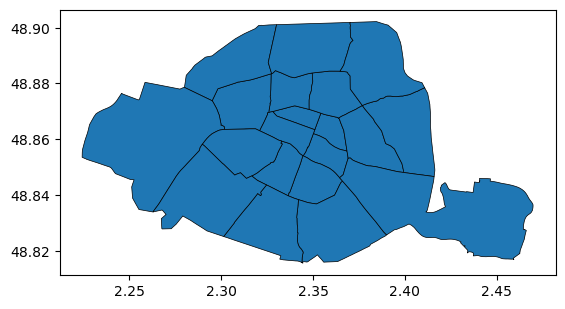

In [59]:
petite_couronne.plot(edgecolor = "black", linewidth = 0.5)

<Axes: >

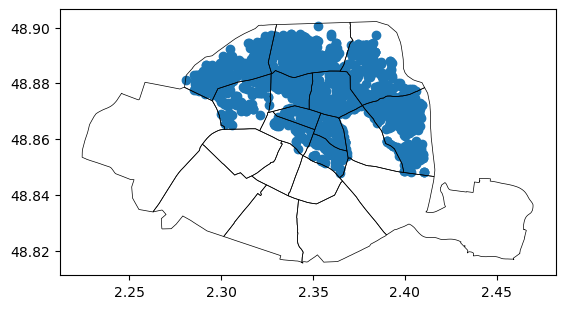

In [60]:
"""Première représentation des appartements dans la carte"""
base = petite_couronne.boundary.plot(edgecolor = "black", linewidth = 0.5)
geo_df_visu.plot(ax=base)

In [61]:
geo_df_visu_agg = gpd.sjoin(geo_df_visu, petite_couronne, predicate = 'within') #on ajoute les données administratives à chaque appartement selon l'arrondissment auquel il appartient

In [63]:
geo_df_visu_agg.head(3)

,Unnamed: 0,id_mutation,date_mutation,prix,type_local,nb_dépendances,surface_reelle_bati,surface_carrez,nombre_pieces_principales,prix_au_m2_carrez,...,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG
0,2,2023-543616,2023-01-04,140000.0,Appartement,0.0,18.0,18.75,1.0,7467.0,...,75056,Capitale d'état,166543,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75117
2,5,2023-543619,2023-01-03,295000.0,Appartement,0.0,28.0,NaN,2.0,NaN,...,75056,Capitale d'état,166543,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75117
6,18,2023-543625,2023-01-06,360000.0,Appartement,0.0,36.0,35.02,1.0,10280.0,...,75056,Capitale d'état,166543,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75117


In [64]:
geo_df_visu_group = (
  geo_df_visu_agg
  .groupby("INSEE_COG")
  .agg({"prix": "mean"})
  .reset_index()
)
#on groupe selon l'arrondissement en faisant la moyenne des prix

In [65]:
geo_df_visu_group.head()

,INSEE_COG,prix
0,75101,6.671402e+05
1,75102,5.278444e+05
2,75103,7.652111e+05
3,75104,9.143716e+05
4,75108,1.047507e+06


In [67]:
petite_couronne_count = petite_couronne.merge(
  geo_df_visu_group
)
#on ajoute aux données administrative le prix moyen
petite_couronne_count.to_crs(2154).head()

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry,prix
0,ARR_MUNI0000000009736045,NaN,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75103,"POLYGON ((652324.622 6862635.302, 652326.463 6...",765211.078947
1,ARR_MUNI0000000009736046,NaN,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75102,"POLYGON ((652167.724 6863604.342, 652193.783 6...",527844.435897
2,ARR_MUNI0000000009736545,NaN,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75104,"POLYGON ((653663.658 6861937.170, 653680.442 6...",914371.561644
3,ARR_MUNI0000000009736043,NaN,Paris 9e Arrondissement,PARIS 9E ARRONDISSEMENT,75056,Capitale d'état,60026,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75109,"POLYGON ((650550.837 6863494.292, 650557.449 6...",683900.702532
4,ARR_MUNI0000000009736042,NaN,Paris 10e Arrondissement,PARIS 10E ARRONDISSEMENT,75056,Capitale d'état,86472,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75110,"POLYGON ((653412.017 6865115.207, 653452.692 6...",432490.085000


<Axes: >

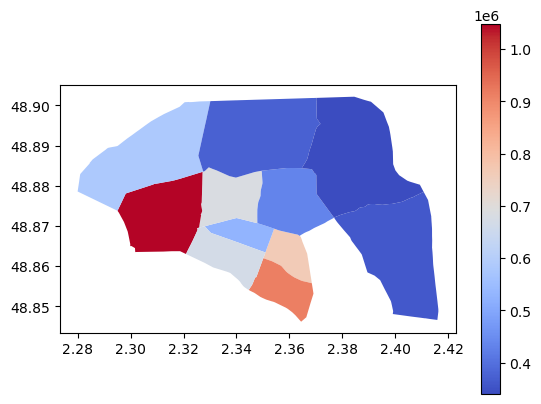

In [68]:
petite_couronne_count.plot(
    column = "prix", cmap="coolwarm", legend=True)